<a href="https://colab.research.google.com/github/vionakaleb/colab-python/blob/main/LaptopPricePredict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('laptopData.csv')

# Display first rows
print(data.head())


In [ ]:
# Replace '?' with NaN
data.replace('?', np.nan, inplace=True)

# Convert to float
data['Ram'] = data['Ram'].str.extract('(\d+)').astype(float)
data['Cpu'] = data['Cpu'].str.extract('([\d.]+)GHz').astype(float)
data['Memory'] = data['Memory'].str.extract('(\d+)').astype(float)

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
data[['Ram', 'Cpu', 'Memory']] = imputer.fit_transform(data[['Ram', 'Cpu', 'Memory']])

# Drop rows with missing values
data.dropna(inplace=True)

# Select target variable
X = data[['Ram', 'Cpu', 'Memory', 'Inches']]
y = data['Price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize and train the linear regression model
model = LinearRegression()
print(X_train)
print(y_train)
model.fit(X_train, y_train)


       Ram  Cpu  Memory Inches
162    8.0  1.6   256.0   15.6
1189  16.0  2.8   256.0   17.3
1181   6.0  2.7   256.0   15.6
287    8.0  2.5   256.0   15.6
791    4.0  1.1    32.0     14
...    ...  ...     ...    ...
1074   8.0  2.5   256.0   12.5
1125   8.0  2.5   256.0     14
1160   8.0  2.6   256.0     14
884    4.0  1.6   500.0   15.6
1156  16.0  2.8   256.0   17.3

[1016 rows x 4 columns]
162      38787.8400
1189    138474.7200
1181     44275.6800
287      52054.5600
791      10810.5120
           ...     
1074     91294.7472
1125     88924.3200
1160     79866.7200
884      19660.3200
1156     79536.3840
Name: Price, Length: 1016, dtype: float64


LinearRegression()

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)


Mean Squared Error: 482830952.7642028


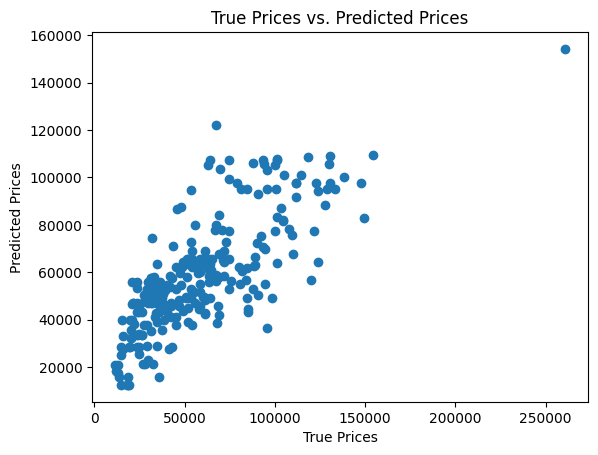

In [ ]:
# Visualize the model
plt.scatter(y_test, y_pred)
plt.xlabel('True Prices')
plt.ylabel('Predicted Prices')
plt.title('True Prices vs. Predicted Prices')
plt.show()

In [ ]:
# Predict the laptop price
new_laptop_data = pd.DataFrame({'Ram': [8], 'Cpu': [3.0], 'Memory': [512], 'Inches': [15.6]})
predicted_price = model.predict(new_laptop_data)
print(new_laptop_data)
print('Predicted Price:', predicted_price[0])

   Ram  Cpu  Memory  Inches
0    8  3.0     512    15.6
Predicted Price: 80544.22780441534
